In [1]:
# Load necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Take a look at the datasource

df = pd.read_csv('dodgers-2022.csv')
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
# See what datatypes the dataset has

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


## Here we see how the data was imported from the csv. The day of the month, attendance, and temperature that day are the only numerical attributes. 

## Month is a 3 character representation of the month, day of the week is self-explanatory, skies refers to the visibility, day_night refers to whether the game was at night or during the day, cap, shirt, and bobblehead likely refer to whether or not that item was given away to the fans as a promotional event, and firewards refers to if there were fireworks around gametime.

In [4]:
# Putting all column names in a list to iterate over and generate unique values

col_names = df.columns.values.tolist()
for n in col_names:
    print('Column Name:, ',n)
    print('Unique Values: ', df[n].unique())
    print('-----------')

Column Name:,  month
Unique Values:  ['APR' 'MAY' 'JUN' 'JUL' 'AUG' 'SEP' 'OCT']
-----------
Column Name:,  day
Unique Values:  [10 11 12 13 14 15 23 24 25 27 28 29  7  8  9 18 19 20 26 30 31 16 17  1
  2  3  4  5  6 21 22]
-----------
Column Name:,  attend
Unique Values:  [56000 29729 28328 31601 46549 38359 26376 44014 26345 44807 54242 48753
 43713 32799 33993 35591 33735 49124 24312 47077 40906 39383 44005 36283
 36561 33306 38016 51137 25509 26773 50559 55279 43494 40432 45210 53504
 49006 49763 44217 55359 34493 33884 53570 43873 54014 39715 32238 53498
 39955 33180 52832 36596 43537 46588 42495 32659 55024 37084 36878 40173
 39805 40284 41907 54621 37622 35992 31607 33540 40619 50560 43309 40167
 42449 35754 37133 40724 35607 33624 42473 34014]
-----------
Column Name:,  day_of_week
Unique Values:  ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
-----------
Column Name:,  opponent
Unique Values:  ['Pirates' 'Padres' 'Braves' 'Nationals' 'Giants' 'Rockies

In [5]:
# are there any NaNs or missing values?

df.isnull().values.any()

False

## One domain item that stands out that I would like to investigate further is the day of the week. 

## Intuition tells me that weekend games may have higher attendance than weekday/weeknight games where people with M-F jobs may have to get up for work the next day. 

## I would like to create a new variable that is a binary of 1 for true/0 for false if the game was on a 'weekend day'. I will consider a 'weekend day' to be either Friday, Saturday, or Sunday.

## For the opponent variable, I would like to create an extra variable identifying if the opponent is in the National League West Division. I confirmed this information via https://en.wikipedia.org/wiki/National_League_West

In [6]:
# creating a new variable

weekend_list = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday' : 1, 'Saturday': 1, 'Sunday': 1}
div_list = {'Pirates': 0, 'Padres': 1, 'Braves': 0, 'Nationals': 0, 'Giants': 1, 'Rockies': 1, 'Snakes': 1, 'Cardinals': 0, 'Astros': 0,
            'Brewers': 0, 'Angels': 0, 'White Sox': 0, 'Mets': 0, 'Reds': 0, 'Phillies': 0, 'Cubs': 0, 'Marlins': 0}

In [7]:
# Here I am mapping the lists from the previous cell to create new variables

df['weekend'] = df['day_of_week'].map(weekend_list)
df['division'] = df['opponent'].map(div_list)
# df['division'] = df['division'].astype(int)

## Next I am going to get dummy variables for the categorical columns

In [11]:
prepped_df = pd.get_dummies(df, prefix={'month':'mo','day_of_week':'day','opponent':'opp','skies':'skies','day_night':'day','cap':'cap','shirt':'shirt','fireworks':'fwks','bobblehead':'bblhd'}, drop_first=True)

In [12]:
prepped_df.head()

,day,attend,temp,weekend,division,mo_AUG,mo_JUL,mo_JUN,mo_MAY,mo_OCT,...,opp_Reds,opp_Rockies,opp_Snakes,opp_White Sox,skies_Cloudy,day_Night,cap_YES,shirt_YES,fwks_YES,bblhd_YES
0,10,56000,67,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,29729,58,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,12,28328,57,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,13,31601,54,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4,14,46549,57,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


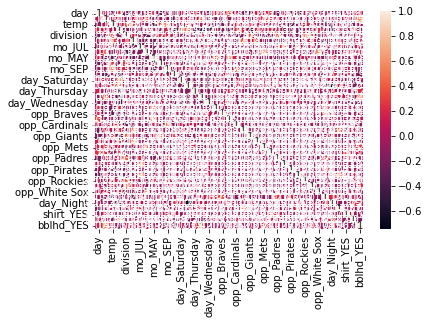

In [28]:
corrMatrix = prepped_df.corr(method = 'spearman')
sn.heatmap(corrMatrix, annot=True)
plt.show()

## The figure above is pretty, but not terribly helpful with 39 variables. Perhaps a table would be better?

In [29]:
prepped_df.corr(method = 'spearman')

,day,attend,temp,weekend,division,mo_AUG,mo_JUL,mo_JUN,mo_MAY,mo_OCT,...,opp_Reds,opp_Rockies,opp_Snakes,opp_White Sox,skies_Cloudy,day_Night,cap_YES,shirt_YES,fwks_YES,bblhd_YES
day,1.000000,0.063626,-0.123692,0.186147,-0.236099,-0.028569,-0.079586,0.108461,0.153172,-0.293820,...,-0.264438,-0.021860,0.052969,0.029382,-0.054252,-0.052377,-0.194109,-0.037777,0.091546,0.141919
attend,0.063626,1.000000,0.090628,0.109905,-0.138674,0.101270,0.096614,0.314192,-0.223536,-0.109043,...,-0.030756,-0.082328,-0.089049,0.139799,-0.144553,-0.031944,-0.051039,0.139799,0.015361,0.544860
temp,-0.123692,0.090628,1.000000,0.018526,0.326263,0.296848,0.012656,-0.132964,-0.337159,0.268880,...,-0.092428,0.161577,0.167468,-0.102230,-0.259024,-0.249189,0.066466,0.011203,-0.178363,0.074884
weekend,0.186147,0.109905,0.018526,1.000000,-0.116024,-0.014135,-0.123649,0.052414,0.019811,-0.188982,...,-0.188982,0.131036,-0.104828,0.203519,-0.125262,-0.303904,0.005897,-0.058148,0.409025,-0.165619
division,-0.236099,-0.138674,0.326263,-0.116024,1.000000,0.149241,-0.023313,-0.316228,0.000000,0.219265,...,-0.175412,0.395285,0.395285,-0.175412,-0.026060,0.042640,-0.142314,-0.043853,-0.080311,0.080582
mo_AUG,-0.028569,0.101270,0.296848,-0.014135,0.149241,1.000000,-0.198811,-0.168550,-0.254824,-0.093495,...,-0.093495,0.134840,0.134840,-0.093495,-0.188903,-0.018182,0.128951,-0.093495,0.034245,0.089337
mo_JUL,-0.079586,0.096614,0.012656,-0.123649,-0.023313,-0.198811,1.000000,-0.147442,-0.222911,-0.081786,...,0.470270,-0.147442,0.073721,-0.081786,0.097204,0.019881,0.157591,-0.081786,-0.006808,0.139015
mo_JUN,0.108461,0.314192,-0.132964,0.052414,-0.316228,-0.168550,-0.147442,1.000000,-0.188982,-0.069338,...,-0.069338,-0.125000,-0.125000,0.554700,-0.103011,-0.033710,-0.056254,0.138675,0.046176,0.089188
mo_MAY,0.153172,-0.223536,-0.337159,0.019811,0.000000,-0.254824,-0.222911,-0.188982,1.000000,-0.104828,...,-0.104828,0.094491,0.000000,-0.104828,-0.155738,0.101929,-0.085049,-0.104828,-0.008726,-0.038526
mo_OCT,-0.293820,-0.109043,0.268880,-0.188982,0.219265,-0.093495,-0.081786,-0.069338,-0.104828,1.000000,...,-0.038462,-0.069338,-0.069338,-0.038462,0.045712,0.093495,-0.031204,-0.038462,-0.089648,-0.077743


## While the table is definitely better, it isn't showing me every column. Since what the business is asking for is to increase attendance specifically, I want to isolate the variables and their correlation with that column.

In [30]:
corr = prepped_df.corr(method = 'spearman')

In [31]:
attendance_corr = corr['attend']

In [33]:
# Isolating the series for the column of attendance and sorting the rows in a descending order.

attendance_corr.sort_values(ascending=False)

attend           1.000000
bblhd_YES        0.544860
day_Tuesday      0.333736
mo_JUN           0.314192
opp_Mets         0.248580
opp_Nationals    0.204106
shirt_YES        0.139799
opp_White Sox    0.139799
day_Saturday     0.128028
weekend          0.109905
opp_Cubs         0.109043
mo_AUG           0.101270
mo_JUL           0.096614
temp             0.090628
day              0.063626
day_Sunday       0.051787
opp_Padres       0.038644
fwks_YES         0.015361
opp_Cardinals    0.015034
opp_Marlins      0.002796
day_Thursday    -0.008776
opp_Phillies    -0.011184
opp_Reds        -0.030756
day_Night       -0.031944
cap_YES         -0.051039
opp_Rockies     -0.082328
opp_Pirates     -0.082481
opp_Giants      -0.086529
opp_Snakes      -0.089049
mo_OCT          -0.109043
mo_SEP          -0.109991
opp_Brewers     -0.134038
division        -0.138674
skies_Cloudy    -0.144553
opp_Astros      -0.156575
opp_Braves      -0.167758
day_Wednesday   -0.167959
mo_MAY          -0.223536
day_Monday  

## When looking specifically at single variables, it appears that 'bblhd_YES' has the highest correlation with attendance. 'day_Tuesday' and 'mo_JUN' also have a fairly strong correlation to attendance. I would interpret this to likely mean that attendance at games with Bobblehead giveaways on Tuesdays in June would be quite successful

In [34]:
# Creating a Multiple Regression Model to see how the variables possibly interact

X = prepped_df.drop('attend', axis=1) # keeping only the independent variables
y = prepped_df['attend'] # Isolating the dependent variable

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) # creating a 20/80 testing/training split
LR = LinearRegression()
LR.fit(X_train,y_train) # fitting the model
y_predict = LR.predict(X_test) # running the model against the test data

In [23]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_predict))) # calculating the root mean squared error for the testing data and the predicted data
test_set_r2 = r2_score(y_test, y_predict) # calculating the r-squared for the testing data and the predictted data
print(test_set_rmse)
print(test_set_r2)

9290.744150802151
0.12209095246024071


## The RMSE is 9291, which means the average deviation between the predicted attendance made by the model and the actual attendance is 9,291 people. The R2 is only able to explain 12% of the variation in attendance. I believe there may be too many independent variables to accurately predict attendance. Next, I'm going to isolate games that have bobblehead giveaways, on Tuesdays, in June, with 2 specific opponents based on the correlation values above and train the model again.

In [36]:
X = prepped_df.drop('attend', axis=1)
X = prepped_df[['bblhd_YES','day_Tuesday','mo_JUN','opp_Mets','opp_Nationals']]
y = prepped_df['attend']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [38]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
test_set_r2 = r2_score(y_test, y_predict)
print(test_set_rmse)
print(test_set_r2)

8425.968915072928
0.27791515733644545


## The RMSE decreased to 8426 people while the R2 increased to 28%. I would use this to advise the organization to consider perhaps increasing bobblehead giveaways on games that are not with the Mets or Nationals in June.